<a href="https://colab.research.google.com/github/wayaadhyasta/PengantarAnalisisData_LearningSchooll/blob/main/Pengantar_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pertemuan 5 :  Missing Value


In [ ]:
import numpy as np
import pandas as pd

df= pd.read_csv('/content/Apartemen.csv')

df

,KodeApt,Wilayah,St_Milik,Jum_kamar
0,104.0,Bantul,Y,3
1,197.0,Sleman,N,3
2,NaN,Sleman,N,NaN
3,201.0,Yogya,12,1
4,203.0,Yogya,Y,3
5,207.0,Yogya,Y,NaN
6,NaN,KL-Progo,NaN,2
7,213.0,Bantul,Y,--
8,215.0,Bantul,Y,na


### **Cek Missing Value**

In [ ]:
df.isnull().values.any()

True

In [ ]:
df.isnull().sum()

,0
KodeApt,2
Wilayah,0
St_Milik,1
Jum_kamar,2


In [ ]:
df['KodeApt']

,KodeApt
0,104.0
1,197.0
2,NaN
3,201.0
4,203.0
5,207.0
6,NaN
7,213.0
8,215.0


In [ ]:
df['KodeApt'].isnull()

,KodeApt
0,False
1,False
2,True
3,False
4,False
5,False
6,True
7,False
8,False


In [ ]:
df['Jum_kamar']

,Jum_kamar
0,3
1,3
2,NaN
3,1
4,3
5,NaN
6,2
7,--
8,na


In [ ]:
df['Jum_kamar'].isnull()

,Jum_kamar
0,False
1,False
2,True
3,False
4,False
5,True
6,False
7,False
8,False


In [ ]:
missing = ['--','na']

df= pd.read_csv('/content/Apartemen.csv', na_values = missing)

df['Jum_kamar']

,Jum_kamar
0,3.0
1,3.0
2,NaN
3,1.0
4,3.0
5,NaN
6,2.0
7,NaN
8,NaN


In [ ]:
df['Jum_kamar'].isnull()

,Jum_kamar
0,False
1,False
2,True
3,False
4,False
5,True
6,False
7,True
8,True


In [ ]:
df['St_Milik']

,St_Milik
0,Y
1,N
2,N
3,12
4,Y
5,Y
6,NaN
7,Y
8,Y


In [ ]:
cnt = 0

for row in df['St_Milik']:
  try:
    df['St_Milik'].isnull()
    int(row)
    df.loc[cnt, 'St_Milik'] = np.nan
  except ValueError:
    pass
  cnt+=1

df['St_Milik'].isnull()

,St_Milik
0,False
1,False
2,False
3,True
4,False
5,False
6,True
7,False
8,False


In [ ]:
df.isnull().sum()

,0
KodeApt,2
Wilayah,0
St_Milik,2
Jum_kamar,4


## **Mengisi Missing Value**

In [ ]:
df['KodeApt'].fillna(837, inplace=True)
df['KodeApt']

<ipython-input-14-aa4048684782>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['KodeApt'].fillna(837, inplace=True)


,KodeApt
0,104.0
1,197.0
2,837.0
3,201.0
4,203.0
5,207.0
6,837.0
7,213.0
8,215.0


In [ ]:
df.loc[6, 'KodeApt']= 415
df['KodeApt']

,KodeApt
0,104.0
1,197.0
2,837.0
3,201.0
4,203.0
5,207.0
6,415.0
7,213.0
8,215.0


In [ ]:
median = df['Jum_kamar'].median()
df['Jum_kamar'].fillna(median, inplace=True)
df['Jum_kamar']

<ipython-input-16-186e91c98f42>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Jum_kamar'].fillna(median, inplace=True)


,Jum_kamar
0,3.0
1,3.0
2,3.0
3,1.0
4,3.0
5,3.0
6,2.0
7,3.0
8,3.0


In [ ]:
df

,KodeApt,Wilayah,St_Milik,Jum_kamar
0,104.0,Bantul,Y,3.0
1,197.0,Sleman,N,3.0
2,837.0,Sleman,N,3.0
3,201.0,Yogya,NaN,1.0
4,203.0,Yogya,Y,3.0
5,207.0,Yogya,Y,3.0
6,415.0,KL-Progo,NaN,2.0
7,213.0,Bantul,Y,3.0
8,215.0,Bantul,Y,3.0


In [ ]:
df.loc[3, 'St_Milik'] = 'N'
df.loc[6, 'St_Milik'] = 'Y'
df['St_Milik']

,St_Milik
0,Y
1,N
2,N
3,N
4,Y
5,Y
6,Y
7,Y
8,Y


In [ ]:
df.to_csv('Apartemen_ok.csv', index=False)

## **Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

df2 = pd.read_csv('/content/Apartemen_ok.csv')
df2

,KodeApt,Wilayah,St_Milik,Jum_kamar
0,104.0,Bantul,Y,3.0
1,197.0,Sleman,N,3.0
2,837.0,Sleman,N,3.0
3,201.0,Yogya,N,1.0
4,203.0,Yogya,Y,3.0
5,207.0,Yogya,Y,3.0
6,415.0,KL-Progo,Y,2.0
7,213.0,Bantul,Y,3.0
8,215.0,Bantul,Y,3.0


In [ ]:
encoding = LabelEncoder()

for col in df2.columns.values:
  if df2[col].dtypes == 'object':
    data = df2[col]
    encoding.fit(data.values)
    df2[col] = encoding.transform(df2[col])

df2

,KodeApt,Wilayah,St_Milik,Jum_kamar
0,104.0,0,1,3.0
1,197.0,2,0,3.0
2,837.0,2,0,3.0
3,201.0,3,0,1.0
4,203.0,3,1,3.0
5,207.0,3,1,3.0
6,415.0,1,1,2.0
7,213.0,0,1,3.0
8,215.0,0,1,3.0


In [ ]:
df2.to_csv('Apartemen_numerik.csv', index=False)

# Pertemuan 6 : Feature Scalling

## **Minmax Scalling**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Membaca dataset
df = pd.read_csv('/content/Apartemen_numerik.csv')
df

,KodeApt,Wilayah,St_Milik,Jum_kamar
0,104.0,0,1,3.0
1,197.0,2,0,3.0
2,837.0,2,0,3.0
3,201.0,3,0,1.0
4,203.0,3,1,3.0
5,207.0,3,1,3.0
6,415.0,1,1,2.0
7,213.0,0,1,3.0
8,215.0,0,1,3.0


In [ ]:
df.describe()

,KodeApt,Wilayah,St_Milik,Jum_kamar
count,9.00000,9.000000,9.000000,9.000000
mean,288.00000,1.555556,0.666667,2.666667
std,221.35266,1.333333,0.500000,0.707107
min,104.00000,0.000000,0.000000,1.000000
25%,201.00000,0.000000,0.000000,3.000000
50%,207.00000,2.000000,1.000000,3.000000
75%,215.00000,3.000000,1.000000,3.000000
max,837.00000,3.000000,1.000000,3.000000


In [ ]:
print(df.shape)

(9, 4)


In [ ]:
# Mengganti pada lokasi spesifik
df.loc[2, 'Jum_kamar'] = 100
df

,KodeApt,Wilayah,St_Milik,Jum_kamar
0,104.0,0,1,3.0
1,197.0,2,0,3.0
2,837.0,2,0,100.0
3,201.0,3,0,1.0
4,203.0,3,1,3.0
5,207.0,3,1,3.0
6,415.0,1,1,2.0
7,213.0,0,1,3.0
8,215.0,0,1,3.0


In [ ]:
# Define fitur yang ingin di scalling
fitur_minmax = df.copy()[['Jum_kamar']]

# Define Scaler dalam Variabel
min_max = MinMaxScaler()

kamar_minmax = min_max.fit_transform(fitur_minmax.values)
print(kamar_minmax)

[[0.02020202]
 [0.02020202]
 [1.        ]
 [0.        ]
 [0.02020202]
 [0.02020202]
 [0.01010101]
 [0.02020202]
 [0.02020202]]


In [ ]:
# Mengganti nilai pada kolom jum_kamar dengan hasil scaling
df['Jum_kamar'] = kamar_minmax
df

,KodeApt,Wilayah,St_Milik,Jum_kamar
0,104.0,0,1,0.020202
1,197.0,2,0,0.020202
2,837.0,2,0,1.000000
3,201.0,3,0,0.000000
4,203.0,3,1,0.020202
5,207.0,3,1,0.020202
6,415.0,1,1,0.010101
7,213.0,0,1,0.020202
8,215.0,0,1,0.020202


In [ ]:
# Beberapa Kolom
for col in df.columns.values:
  features = df[[col]]
  feature_min_max = min_max.fit_transform(features)
  df[col] = feature_min_max

df

,KodeApt,Wilayah,St_Milik,Jum_kamar
0,0.000000,0.000000,1.0,0.020202
1,0.126876,0.666667,0.0,0.020202
2,1.000000,0.666667,0.0,1.000000
3,0.132333,1.000000,0.0,0.000000
4,0.135061,1.000000,1.0,0.020202
5,0.140518,1.000000,1.0,0.020202
6,0.424284,0.333333,1.0,0.010101
7,0.148704,0.000000,1.0,0.020202
8,0.151432,0.000000,1.0,0.020202


## **Standard Scalling**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

fitur_standar = df.copy()[['KodeApt']]

standarisasi = scaler.fit_transform(fitur_standar)

print(standarisasi)

[[-0.88167665]
 [-0.4360466 ]
 [ 2.63065479]
 [-0.41687972]
 [-0.40729628]
 [-0.38812939]
 [ 0.60854856]
 [-0.35937907]
 [-0.34979563]]


In [ ]:
df['KodeApt'] = standarisasi
df

,KodeApt,Wilayah,St_Milik,Jum_kamar
0,-0.881677,0.000000,1.0,0.020202
1,-0.436047,0.666667,0.0,0.020202
2,2.630655,0.666667,0.0,1.000000
3,-0.416880,1.000000,0.0,0.000000
4,-0.407296,1.000000,1.0,0.020202
5,-0.388129,1.000000,1.0,0.020202
6,0.608549,0.333333,1.0,0.010101
7,-0.359379,0.000000,1.0,0.020202
8,-0.349796,0.000000,1.0,0.020202


In [ ]:
df.to_csv('Apartemen_scaling.csv', index=False)

In [ ]:
df= pd.read_csv('/content/Apartemen_scaling.csv')
df

,KodeApt,Wilayah,St_Milik,Jum_kamar
0,-0.881677,0.000000,1.0,0.020202
1,-0.436047,0.666667,0.0,0.020202
2,2.630655,0.666667,0.0,1.000000
3,-0.416880,1.000000,0.0,0.000000
4,-0.407296,1.000000,1.0,0.020202
5,-0.388129,1.000000,1.0,0.020202
6,0.608549,0.333333,1.0,0.010101
7,-0.359379,0.000000,1.0,0.020202
8,-0.349796,0.000000,1.0,0.020202


# Pertemuan 8 : Visualization

In [ ]:
# Load Dataset
import pandas as pd
import numpy as np
df = pd.read_csv('/content/Apartemen_ok.csv')
df

,KodeApt,Wilayah,St_Milik,Jum_kamar
0,104.0,Bantul,Y,3.0
1,197.0,Sleman,N,3.0
2,837.0,Sleman,N,3.0
3,201.0,Yogya,N,1.0
4,203.0,Yogya,Y,3.0
5,207.0,Yogya,Y,3.0
6,415.0,KL-Progo,Y,2.0
7,213.0,Bantul,Y,3.0
8,215.0,Bantul,Y,3.0


In [ ]:
df.loc[6, 'KodeApt']= 837
df.loc[2, 'KodeApt']= 8837
df['KodeApt']

,KodeApt
0,104.0
1,197.0
2,8837.0
3,201.0
4,203.0
5,207.0
6,837.0
7,213.0
8,215.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   KodeApt    9 non-null      float64
 1   Wilayah    9 non-null      object 
 2   St_Milik   9 non-null      object 
 3   Jum_kamar  9 non-null      float64
dtypes: float64(2), object(2)
memory usage: 416.0+ bytes


In [ ]:
# Membuat Class untuk data
label_kelas = ['Murah', 'Murah', 'Mahal', 'Murah', 'Mahal', 'Mahal', 'Mahal', 'Murah', 'Murah']

# Membuat kolom baru bernama Label
df['Label'] = label_kelas
df

,KodeApt,Wilayah,St_Milik,Jum_kamar,Label
0,104.0,Bantul,Y,3.0,Murah
1,197.0,Sleman,N,3.0,Murah
2,8837.0,Sleman,N,3.0,Mahal
3,201.0,Yogya,N,1.0,Murah
4,203.0,Yogya,Y,3.0,Mahal
5,207.0,Yogya,Y,3.0,Mahal
6,837.0,KL-Progo,Y,2.0,Mahal
7,213.0,Bantul,Y,3.0,Murah
8,215.0,Bantul,Y,3.0,Murah


In [ ]:
# Menampilkan deskripsi statistik untuk kolom numerik
df.describe()

,KodeApt,Jum_kamar
count,9.000000,9.000000
mean,1223.777778,2.666667
std,2863.130445,0.707107
min,104.000000,1.000000
25%,201.000000,3.000000
50%,207.000000,3.000000
75%,215.000000,3.000000
max,8837.000000,3.000000


In [ ]:
# Mengeksplore kolom kategorik
df.Wilayah.unique()
# df.Wilayah.value_counts()

array(['Bantul', 'Sleman', 'Yogya', 'KL-Progo'], dtype=object)

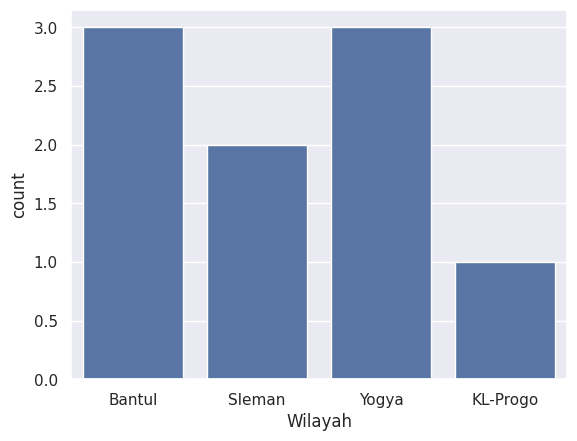

In [ ]:
import seaborn as sns

# Menampilkan diagram batang kolom Wilayah
sns.set(style='darkgrid')
ax = sns.countplot(x='Wilayah', data=df)

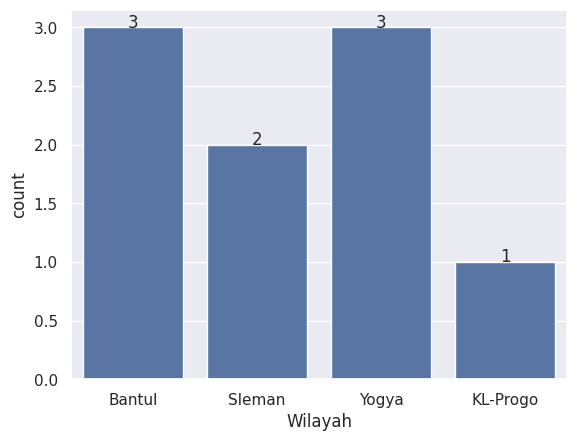

In [ ]:
# Bentuk lain plot kolom wilayah
ax = sns.countplot(x='Wilayah', data=df)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2, height, '{:1.0f}'.format((height)), ha='center')

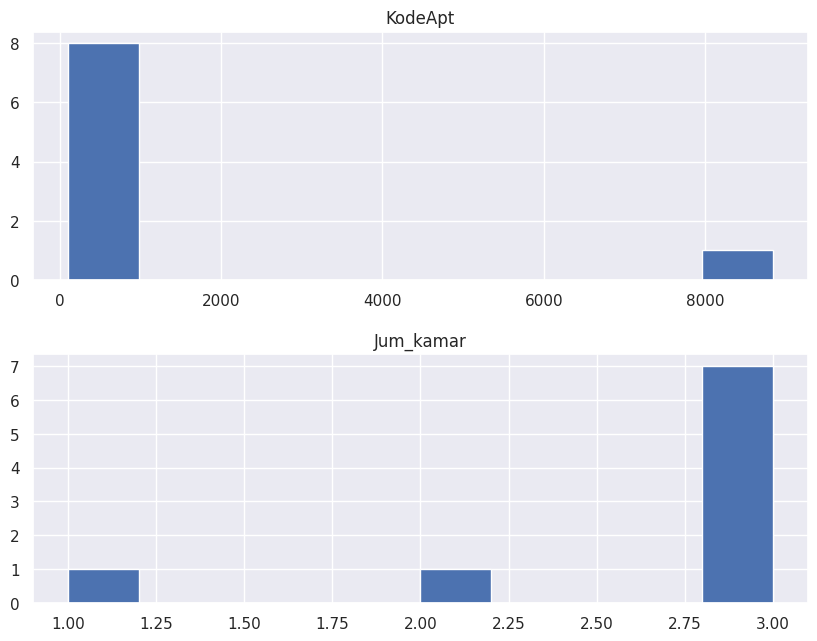

In [ ]:
# Menampilkan Histogram untuk semua attribute numerik
import matplotlib.pyplot as plt

# numerik_df=df.select_dtypes(include=['float64'])
# numerik_index = numerik_df.columns
df.hist(column=df.columns, figsize=(10,20), layout=(5,1))
plt.show()

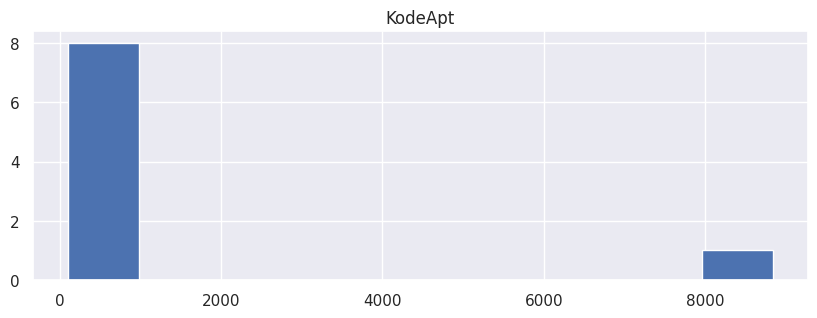

In [ ]:
# # Untuk kolom tertentu
# selected_columns = ['KodeApt']
# selected_index = selected_columns
df.hist(column = 'KodeApt', figsize=(10,20), layout=(5,1))

plt.show()

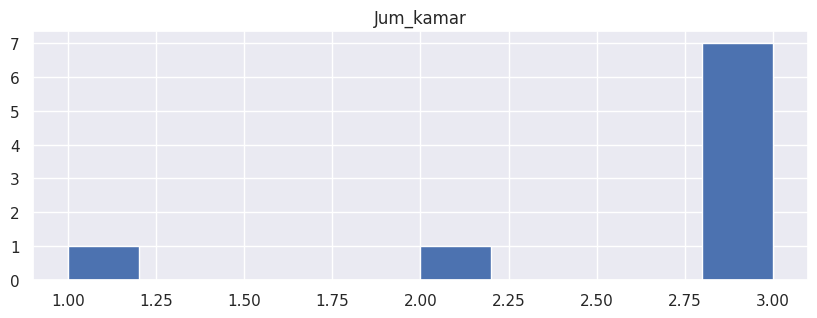

In [ ]:
# Untuk kolom tertentu
df.hist(column='Jum_kamar', figsize=(10,20), layout=(5,1))

plt.show()

[]

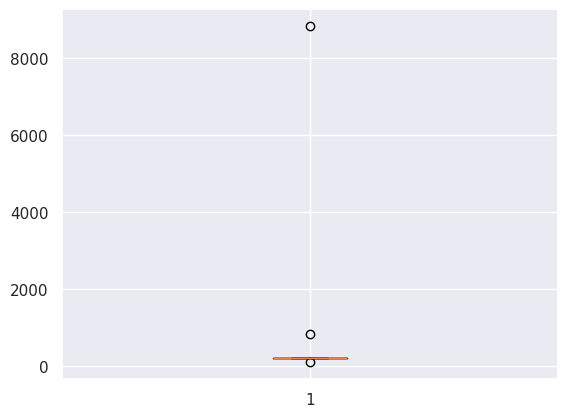

In [ ]:
# boxplot untuk melihat outlier yang dapat terjadi
plt.boxplot(df.KodeApt)
plt.plot()

# Pertemuan 9: Select Attribute


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/Kredit_ku.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: '/content/Kredit_ku.csv'

In [ ]:
creditScore_index = ['Credit_score']
creditScore_df = df[['Credit_score']]
creditScore_df.info()

creditScore_df.isnull().sum()

In [ ]:
df.info()
df.isnull().sum()

In [ ]:
df.Credit_score.value_counts()
# df.Credit_score.unique()

In [ ]:
df_attribute = df.drop('Credit_score', axis=1)
df_attribute.info()
df_attribute.shape

In [ ]:
df_attribute.isnull().sum()

In [ ]:
df_kategori = df.select_dtypes(include=['object'])
df_kategori

In [ ]:
df_numerik = df.select_dtypes(include=['int64'])
df_numerik

In [ ]:
import matplotlib.pyplot as plt

df.hist(column=df.columns, figsize=(10,30), layout=(7,1))
plt.show()

In [ ]:
import seaborn as sns

sns.boxplot(x='Credit_score', y='Durasi', data=df)

In [ ]:
df[['Credit_score', 'Durasi']].groupby(['Credit_score'], as_index=False).mean().sort_values(by='Durasi', ascending=False)

## Uji Hipotesis atribut numerik

In [ ]:
import random
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

zscore_durasi = np.abs(stats.zscore(df['Durasi'])) < 3
# zscore_durasi.value_counts()
df = df[zscore_durasi]

income_1 = df[df['Credit_score'] == 1]['Durasi']
income_0 = df[df['Credit_score'] == 2]['Durasi']
# print(income_1)
# print(income_0)

income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 10)
# print(income_1)

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 10)
# print(income_0)

ttest,pval = ttest_ind(income_1, income_0, equal_var=False)
print(f'ttest   : {ttest}')
print(f'p value : {pval}')

if pval <0.05:
  print('H0 ditolak')
else:
  print('H0 diterima')

In [ ]:
import random
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

zscore_Jum_kredit = np.abs(stats.zscore(df['Jum_kredit'])) < 3
# zscore_Jum_kredit.value_counts()
df = df[zscore_Jum_kredit]

income_1 = df[df['Credit_score'] == 1]['Jum_kredit']
income_0 = df[df['Credit_score'] == 2]['Jum_kredit']

# income_1 = income_1.values.tolist()
# income_1 = random.sample(income_1, 10)
# income_0 = income_0.values.tolist()
# income_0 = random.sample(income_0, 10)

ttest,pval = ttest_ind(income_1, income_0, equal_var=False)
print(f'ttest   : {ttest}')
print(f'p value : {pval}')

if pval <0.05:
  print('H0 ditolak')
else:
  print('H0 diterima')

In [ ]:
import random
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

zscore_Jum_tanggungan = np.abs(stats.zscore(df['Jum_tanggungan'])) < 3
# zscore_Jum_tanggungan.value_counts()
df = df[zscore_Jum_tanggungan]

income_1 = df[df['Credit_score'] == 1]['Jum_tanggungan']
income_0 = df[df['Credit_score'] == 2]['Jum_tanggungan']

# income_1 = income_1.values.tolist()
# income_1 = random.sample(income_1, 10)
# income_0 = income_0.values.tolist()
# income_0 = random.sample(income_0, 10)

ttest,pval = ttest_ind(income_1, income_0, equal_var=False)
print(f'ttest   : {ttest}')
print(f'p value : {pval}')

if pval <0.05:
  print('H0 ditolak')
else:
  print('H0 diterima')

## Uji attribute Kategorik

In [ ]:
def bar_chart(feature):
  Accepted = df[df['Credit_score'] == 1][feature].value_counts()
  Rejected = df[df['Credit_score'] == 2][feature].value_counts()

  df1 = pd.DataFrame([Accepted, Rejected])
  df1.index = ['Accepted', 'Rejected']

  df1.plot(kind='bar', stacked=True, fig=(18,6), title=feature)

In [ ]:
# print(df.select_dtypes(include=['object']).columns)

In [ ]:
bar_chart('Riwayat_kredit')

In [ ]:
# Contingency Table
c_table = pd.crosstab(df['Riwayat_kredit'], df['Credit_score'], margins=False)
c_table

In [ ]:
from scipy.stats import chi2_contingency, chi2

stat, p, dof, expected = chi2_contingency(c_table)
print(f'dof       : {dof}')
print(f'p value   : {p}')
print(f'Expected  : {expected}')

# Interpret test-statistic
prob = 0.99
critical = chi2.ppf(prob, dof)
print(f'''
Probabilitas  : {prob:.3f}
Critical      : {critical:.3f}
Stat          : {stat:.3f}
''')

if abs(stat) >= critical:
  print(f'Dependent (Tolak H0), stat {stat:3f}, critical {critical:3f}')
else:
  print(f'Independent (Terima H0), stat {stat:3f}, critical {critical:3f}')

NameError: name 'c_table' is not defined

In [ ]:
kolom_kategorik = df.select_dtypes(include=['object']).columns

for i in kolom_kategorik:
  cc_table = pd.crosstab(df[i], df['Credit_score'], margins=False)

  stat, p, dof, expected = chi2_contingency(cc_table)

  # Interpret test-statistic
  prob = 0.99
  critical = chi2.ppf(prob, dof)

  if abs(stat) >= critical:
    print(f'Feature {i} merupakan Dependent (Tolak H0)')
  else:
    print(f'Feature {i} merupakan Independent (Terima H0)')
  # print(cc_table)

In [ ]:
from sklearn.preprocessing import LabelEncoder

kolom_kategorik = df.select_dtypes(include=['object']).columns

le = LabelEncoder()

for col in kolom_kategorik:
  df[col] = le.fit_transform(df[col])

# Menampilkan korelasi
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
# Correlation with output variable
cor_target = abs(cor['Credit_score'])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

# Pertemuan 11 : PySpark


## Augmentasi

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import random

# Membaca file CSV
file1_path = "/content/drive/MyDrive/Colab Notebooks/PAD/Apartemen_ok.csv"  # Ganti dengan path file Anda
file2_path = "/content/drive/MyDrive/Colab Notebooks/PAD/Tambahan_Apartemen.csv"  # Ganti dengan path file Anda

df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)

# Fungsi untuk memperbanyak data
def augment_data_with_conditions(df1, df2, target_size=100):
    # Perbanyak df1 tanpa perubahan
    df1_augmented = pd.concat([df1] * (target_size // len(df1) + 1), ignore_index=True)
    df1_augmented = df1_augmented.sample(target_size, replace=False).reset_index(drop=True)

    # Perbanyak df2 dengan duplikasi sebagian dan missing value
    df2_augmented = pd.concat([df2] * (target_size // len(df2) + 1), ignore_index=True)
    df2_augmented = df2_augmented.sample(target_size, replace=False).reset_index(drop=True)

    # Menambahkan missing values ke df2 (10% data)
    num_missing = int(0.1 * len(df2_augmented))
    for _ in range(num_missing):
        idx = random.choice(df2_augmented.index)
        col = random.choice(df2_augmented.columns)
        df2_augmented.loc[idx, col] = None

    # Menambahkan duplikasi pada sebagian df2 (20% data)
    num_duplicates = int(0.2 * len(df2_augmented))
    duplicates = df2_augmented.sample(num_duplicates, replace=False)
    df2_augmented = pd.concat([df2_augmented, duplicates]).reset_index(drop=True)

    return df1_augmented, df2_augmented

# Memperbanyak data sesuai kondisi
augmented_df1, augmented_df2 = augment_data_with_conditions(df1, df2, target_size=100)

# Menyimpan hasil ke file lokal
augmented_df1.to_csv("/content/drive/MyDrive/Colab Notebooks/PAD/Apartemen_augmented.csv",
                     index=False)
augmented_df2.to_csv("/content/drive/MyDrive/Colab Notebooks/PAD/Tambahan_Apartemen_augmented.csv",
                     index=False)

print("File berhasil disimpan:")
print("- Apartemen_augmented.csv (tanpa missing atau duplikat)")
print("- Tambahan_Apartemen_augmented.csv (dengan missing value dan beberapa duplikat)")

File berhasil disimpan:
- Apartemen_augmented.csv (tanpa missing atau duplikat)
- Tambahan_Apartemen_augmented.csv (dengan missing value dan beberapa duplikat)


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PAD/Apartemen_augmented.csv')
df.duplicated().sum()

91

## PySpark SQL

In [ ]:
# Install pyspark

!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *

# Membuat session untuk mengakses semua fungsi spark dan DataFrame API
spark = SparkSession.builder \
    .appName("Pengenalan Dataframe Spark") \
    .getOrCreate()

AptSchema = StructType([
    StructField('KodeApt', FloatType(), True),
    StructField('Wilayah', StringType(), True),
    StructField('St_Milik', StringType(), True),
    StructField('Jum_kamar', FloatType(), True),
])

AptDataframe = spark.read.csv('/content/drive/MyDrive/Colab Notebooks/PAD/Apartemen_ok.csv',
                              header=True, schema=AptSchema, sep=';')

AptDataframe.show()

+-------+--------+--------+---------+
|KodeApt| Wilayah|St_Milik|Jum_kamar|
+-------+--------+--------+---------+
|  104.0|  Bantul|       Y|      3.0|
|  197.0|  Sleman|       N|      3.0|
| 8837.0|  Sleman|       N|      3.0|
|  201.0|   Yogya|       N|      1.0|
|  203.0|   Yogya|       Y|      3.0|
|  207.0|   Yogya|       Y|      3.0|
|  837.0|KL-Progo|       Y|      2.0|
|  213.0|  Bantul|       Y|      3.0|
|  215.0|  Bantul|       Y|      3.0|
|  203.0|   Yogya|       Y|      3.0|
+-------+--------+--------+---------+



In [ ]:
# Menghitung jumlah baris
JumlahBaris = AptDataframe.count()
print(f'Jumlah Baris : {JumlahBaris}')

Jumlah Baris : 10


In [ ]:
# Melihat Schema Dataframe
AptDataframe.printSchema()

root
 |-- KodeApt: float (nullable = true)
 |-- Wilayah: string (nullable = true)
 |-- St_Milik: string (nullable = true)
 |-- Jum_kamar: float (nullable = true)



In [ ]:
AptDataframe.describe('KodeApt').show()

+-------+------------------+
|summary|           KodeApt|
+-------+------------------+
|  count|                10|
|   mean|            1121.7|
| stddev|2718.6172159144926|
|    min|             104.0|
|    max|            8837.0|
+-------+------------------+



In [ ]:
# Membuat SQL Temporary View
AptDataframe.createOrReplaceTempView('AptSQL')

# Menampilkan hanya kolom kodeapt dan wilayah
kodeWilayah = spark.sql("SELECT KodeApt, Wilayah FROM AptSQL")
kodeWilayah.show()

+-------+--------+
|KodeApt| Wilayah|
+-------+--------+
|  104.0|  Bantul|
|  197.0|  Sleman|
| 8837.0|  Sleman|
|  201.0|   Yogya|
|  203.0|   Yogya|
|  207.0|   Yogya|
|  837.0|KL-Progo|
|  213.0|  Bantul|
|  215.0|  Bantul|
|  203.0|   Yogya|
+-------+--------+



In [ ]:
# Mengurutkan data berdasarkan Wilayah secara ascending (default)
kodeWilayahOrdered = spark.sql("SELECT KodeApt, Wilayah FROM AptSQL ORDER BY KodeApt ASC")
kodeWilayahOrdered.show()

+-------+--------+
|KodeApt| Wilayah|
+-------+--------+
|  104.0|  Bantul|
|  197.0|  Sleman|
|  201.0|   Yogya|
|  203.0|   Yogya|
|  203.0|   Yogya|
|  207.0|   Yogya|
|  213.0|  Bantul|
|  215.0|  Bantul|
|  837.0|KL-Progo|
| 8837.0|  Sleman|
+-------+--------+



In [ ]:
# Filter data untuk wilayah tertentu
kodeWilayahFiltered = spark.sql("SELECT KodeApt, Wilayah FROM AptSQL WHERE Wilayah = 'Bantul'")
kodeWilayahFiltered.show()

+-------+-------+
|KodeApt|Wilayah|
+-------+-------+
|  104.0| Bantul|
|  213.0| Bantul|
|  215.0| Bantul|
+-------+-------+



In [ ]:
kodeWilayahFilteredOrdered = spark.sql("""
    SELECT KodeApt, Wilayah
    FROM AptSQL
    WHERE Wilayah != 'Bantul'
    ORDER BY KodeApt ASC
""")
kodeWilayahFilteredOrdered.show()

+-------+--------+
|KodeApt| Wilayah|
+-------+--------+
|  197.0|  Sleman|
|  201.0|   Yogya|
|  203.0|   Yogya|
|  203.0|   Yogya|
|  207.0|   Yogya|
|  837.0|KL-Progo|
| 8837.0|  Sleman|
+-------+--------+



In [ ]:
HargaSchema = StructType([
    StructField('KodeApt', FloatType(), False),
    StructField('IdWilayah', StringType(), False),
    StructField('Harga', IntegerType(), False),
])

HargaAptDataframe = spark.read.csv('/content/drive/MyDrive/Colab Notebooks/PAD/Tambahan_Apartemen.csv',
                                   header=True,schema=HargaSchema, sep=';')
HargaAptDataframe.show()

+-------+---------+---------+
|KodeApt|IdWilayah|    Harga|
+-------+---------+---------+
|  104.0|     B001|400000000|
|  197.0|     S001|425000000|
| 8837.0|     S002|500000000|
|  201.0|     Y001|600000000|
|  203.0|     Y002|575000000|
|  207.0|     Y003|615000000|
|  837.0|     K001|375000000|
|  213.0|     B002|     NULL|
|  215.0|     B003|425000000|
|  203.0|     Y002|575000000|
+-------+---------+---------+



In [ ]:
key_column = 'KodeApt'

AptJoin = AptDataframe.join(HargaAptDataframe, on=key_column, how='Left')
AptJoin.show()

In [ ]:
BarisJoin = AptJoin.count()
print(f'Jumlah Baris setelah Join : {BarisJoin}')

Jumlah Baris setelah Join : 12


In [ ]:
AptND = AptJoin.dropDuplicates()
print(f'Jumlah Baris tanpa duplikat : {AptND.count()}')

Jumlah Baris tanpa duplikat : 9


In [ ]:
AptNoMissing = AptND.dropna(subset='Harga')
AptNoMissing.show()

+-------+--------+--------+---------+---------+---------+
|KodeApt| Wilayah|St_Milik|Jum_kamar|IdWilayah|    Harga|
+-------+--------+--------+---------+---------+---------+
|  215.0|  Bantul|       Y|      3.0|     B003|425000000|
|  207.0|   Yogya|       Y|      3.0|     Y003|615000000|
| 8837.0|  Sleman|       N|      3.0|     S002|500000000|
|  197.0|  Sleman|       N|      3.0|     S001|425000000|
|  201.0|   Yogya|       N|      1.0|     Y001|600000000|
|  837.0|KL-Progo|       Y|      2.0|     K001|375000000|
|  104.0|  Bantul|       Y|      3.0|     B001|400000000|
|  203.0|   Yogya|       Y|      3.0|     Y002|575000000|
+-------+--------+--------+---------+---------+---------+



In [ ]:
MeanHarga = AptND.groupBy().avg('Harga').take(1)[0][0]
print(f'Rata-rata Harga : {MeanHarga}')

AptClean = AptND.fillna({'Harga' : MeanHarga})
AptClean.show()

In [ ]:
# Melihat Statistik data Clean
AptClean.describe().show()

In [ ]:
# Melihat korelasi
KorelasiKamar = AptClean.corr('Jum_kamar', 'Harga')
print(f'Korelasi Jum_kamar dan Harga : {KorelasiKamar}')

Korelasi Jum_kamar dan Harga : -0.20988690214182212


In [ ]:
MeanHarga_2 = AptND.agg({'Harga': 'avg'}).take(1)[0]
print(MeanHarga_2)

Row(avg(Harga)=489375000.0)


# Pertemuan 12 : Linear Regression


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
from pyspark.sql import SparkSession, SQLContext
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

spark = SparkSession.builder \
    .appName("Regression with Spark") \
    .getOrCreate()

irisSchema = StructType([
    StructField('Sepal_Length', FloatType(), False),
    StructField('Sepal_Width', FloatType(), False),
    StructField('Petal_Length', FloatType(), False),
    StructField('Petal_Width', FloatType(), False),
    StructField('Tinggi', FloatType(), False)
])

irisDataFrame = spark.read.csv('/content/drive/MyDrive/Colab Notebooks/PAD/iris_regression.csv',
                               schema=irisSchema, header=True)

irisDataFrame.show()

+------------+-----------+------------+-----------+------+
|Sepal_Length|Sepal_Width|Petal_Length|Petal_Width|Tinggi|
+------------+-----------+------------+-----------+------+
|         5.1|        3.5|         1.4|        0.2|  50.2|
|         4.9|        3.0|         1.4|        0.2|  48.7|
|         4.7|        3.2|         1.3|        0.2|  49.5|
|         4.6|        3.1|         1.5|        0.2|  47.8|
|         5.0|        3.6|         1.4|        0.2|  51.0|
|         5.4|        3.9|         1.7|        0.4|  52.3|
|         4.6|        3.4|         1.4|        0.3|  48.2|
|         5.0|        3.4|         1.5|        0.2|  50.5|
|         4.4|        2.9|         1.4|        0.2|  47.1|
|         4.9|        3.1|         1.5|        0.1|  48.9|
|         5.4|        3.7|         1.5|        0.2|  53.0|
|         4.8|        3.4|         1.6|        0.2|  48.5|
|         4.8|        3.0|         1.4|        0.1|  48.3|
|         4.3|        3.0|         1.1|        0.1|  46.

In [ ]:
data = irisDataFrame.select('Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Tinggi')
data.show()

+------------+-----------+------------+-----------+------+
|Sepal_Length|Sepal_Width|Petal_Length|Petal_Width|Tinggi|
+------------+-----------+------------+-----------+------+
|         5.1|        3.5|         1.4|        0.2|  50.2|
|         4.9|        3.0|         1.4|        0.2|  48.7|
|         4.7|        3.2|         1.3|        0.2|  49.5|
|         4.6|        3.1|         1.5|        0.2|  47.8|
|         5.0|        3.6|         1.4|        0.2|  51.0|
|         5.4|        3.9|         1.7|        0.4|  52.3|
|         4.6|        3.4|         1.4|        0.3|  48.2|
|         5.0|        3.4|         1.5|        0.2|  50.5|
|         4.4|        2.9|         1.4|        0.2|  47.1|
|         4.9|        3.1|         1.5|        0.1|  48.9|
|         5.4|        3.7|         1.5|        0.2|  53.0|
|         4.8|        3.4|         1.6|        0.2|  48.5|
|         4.8|        3.0|         1.4|        0.1|  48.3|
|         4.3|        3.0|         1.1|        0.1|  46.

In [ ]:
# Membagi data dengan perbandingan 70% data latih dan 30% data uji
Split_data = data.randomSplit([0.7, 0.3], 1)
trainingData = Split_data[0]
testingData = Split_data[1]

train_rows = trainingData.count()
test_rows = testingData.count()
print(f'Training : {train_rows} Testing : {test_rows}')

trainingData.show()
testingData.show()

Training : 13 Testing : 7
+------------+-----------+------------+-----------+------+
|Sepal_Length|Sepal_Width|Petal_Length|Petal_Width|Tinggi|
+------------+-----------+------------+-----------+------+
|         4.3|        3.0|         1.1|        0.1|  46.5|
|         4.4|        2.9|         1.4|        0.2|  47.1|
|         4.6|        3.1|         1.5|        0.2|  47.8|
|         4.6|        3.4|         1.4|        0.3|  48.2|
|         4.8|        3.4|         1.6|        0.2|  48.5|
|         4.9|        3.0|         1.4|        0.2|  48.7|
|         4.9|        3.1|         1.5|        0.1|  48.9|
|         5.0|        3.4|         1.5|        0.2|  50.5|
|         5.0|        3.6|         1.4|        0.2|  51.0|
|         5.1|        3.5|         1.4|        0.2|  50.2|
|         5.1|        3.8|         1.5|        0.3|  51.5|
|         5.7|        4.4|         1.5|        0.4|  55.0|
|         5.8|        4.0|         1.2|        0.2|  54.1|
+------------+-----------+----

In [ ]:
# Define assembler
assembler = VectorAssembler(inputCols=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'],
                            outputCol='features')

# Mengubah data menjadi fitur satu kolom
trainingDataFinal = assembler.transform(trainingData).select(col('features'), col('Tinggi').cast('Float')\
                                                             .alias('label'))
trainingDataFinal.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[4.30000019073486...| 46.5|
|[4.40000009536743...| 47.1|
|[4.59999990463256...| 47.8|
|[4.59999990463256...| 48.2|
|[4.80000019073486...| 48.5|
|[4.90000009536743...| 48.7|
|[4.90000009536743...| 48.9|
|[5.0,3.4000000953...| 50.5|
|[5.0,3.5999999046...| 51.0|
|[5.09999990463256...| 50.2|
|[5.09999990463256...| 51.5|
|[5.69999980926513...| 55.0|
|[5.80000019073486...| 54.1|
+--------------------+-----+



In [ ]:
# Define algoritma
algoritma = LinearRegression(labelCol='label', featuresCol='features', maxIter=10, regParam=0.3)

# Training Data
model = algoritma.fit(trainingDataFinal)

print(f'Nilai Koefisien Regresi : {model.coefficients}')
print(f'Nilai Konstanta Regresi : {model.intercept}')

Nilai Koefisien Regresi : [3.1891535324441787,2.19913135857216,-0.36080737484732317,1.904215187854911]
Nilai Konstanta Regresi : 26.652472034809424


In [ ]:
# Mengubah data menjadi fitur satu kolom
testingDataFinal = assembler.transform(testingData).select(col('features'), col('Tinggi').cast('Float')\
                                                           .alias('trueLabel'))
testingDataFinal.show()

+--------------------+---------+
|            features|trueLabel|
+--------------------+---------+
|[4.69999980926513...|     49.5|
|[4.80000019073486...|     48.3|
|[5.09999990463256...|     51.2|
|[5.40000009536743...|     53.0|
|[5.40000009536743...|     52.8|
|[5.40000009536743...|     52.3|
|[5.69999980926513...|     54.7|
+--------------------+---------+



In [ ]:
# Melakukan Prediksi Regresi
prediksi = model.transform(testingDataFinal)

hasilPrediksi = prediksi.select('features', 'prediction', 'trueLabel')
hasilPrediksi.show()

+--------------------+------------------+---------+
|            features|        prediction|trueLabel|
+--------------------+------------------+---------+
|[4.69999980926513...| 48.59050695445707|     49.5|
|[4.80000019073486...|48.243094879979786|     48.3|
|[5.09999990463256...| 51.35000588672918|     51.2|
|[5.40000009536743...| 51.85031952670411|     53.0|
|[5.40000009536743...| 52.74315043870139|     52.8|
|[5.40000009536743...|52.598827454353184|     52.3|
|[5.69999980926513...| 53.14523764378133|     54.7|
+--------------------+------------------+---------+



In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

# Mengukur kinerja model regresi menggunakan RMSE
evaluator = RegressionEvaluator(labelCol='trueLabel', predictionCol='prediction', metricName='rmse')

rmse = evaluator.evaluate(hasilPrediksi)
print(f'Root Mean Square Error (RMSE) : {rmse}')

Root Mean Square Error (RMSE) : 0.8180552618083445
